In [1]:
import importlib
import os
import fonctions_temporel
importlib.reload(fonctions_temporel)
from fonctions_temporel import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [2]:
df=load_data("../../challenge_data/train_tweets")
df.head()





ID,MatchID,PeriodID,EventType,Timestamp,Tweet
str,i64,i64,i64,i64,str
"""2_0""",2,0,0,1403538600000,"""RT @soccerdotcom: If #ESP beat…"
"""2_0""",2,0,0,1403538600000,"""Visit the #SITEP official web …"
"""2_0""",2,0,0,1403538600000,"""RT @soccerdotcom: If #ESP beat…"
"""2_0""",2,0,0,1403538600000,"""RT @worldsoccershop: If there …"
"""2_0""",2,0,0,1403538600000,"""RT @soccerdotcom: If #AUS beat…"


In [3]:
df_sec=add_time_sec(df)
df_sec.head()

df_freq=df_freq_normalized(df_sec)
df_freq.head()


MatchID,Seconds,PeriodID,Effectif,MatchDuration,EventType_Mean,Effectif_Normalisé
i64,i64,i64,u32,i64,f64,f64
10,1460,24,83,59,0.0,0.005941
5,6522,108,59,59,0.0,0.006621
14,426,7,13,59,1.0,0.007732
10,1524,25,76,59,0.0,0.00544
18,5715,95,7,59,0.0,0.004821


In [4]:
df_augmented=df_sec_new_features(df_freq, 50)
df_augmented_trimmed=df_augmented.drop('Effectif', 'MatchDuration')
df_augmented_trimmed.head()


MatchID,Seconds,PeriodID,EventType_Mean,Effectif_Normalisé,Effectif_Normalisé_Lissé,Effectif_Normalisé_Lissé_Derivé,Effectif_Normalisé_Lissé_Derivé_Seg
i64,i64,i64,f64,f64,f64,f64,f64
10,1460,24,0.0,0.005941,0.006793,1.1515e-7,1.0589e-7
5,6522,108,0.0,0.006621,0.006793,1.6810e-7,1.0589e-7
14,426,7,1.0,0.007732,0.006793,2.8952e-7,1.3696e-7
10,1524,25,0.0,0.00544,0.006794,4.2153e-7,1.2706e-7
18,5715,95,0.0,0.004821,0.006794,5.4957e-7,1.2903e-7


In [5]:

df_train, df_test = split_sets(df_augmented_trimmed, [10, 11])
df_train.head()
print(df_train.columns)



['MatchID', 'Seconds', 'PeriodID', 'EventType_Mean', 'Effectif_Normalisé', 'Effectif_Normalisé_Lissé', 'Effectif_Normalisé_Lissé_Derivé', 'Effectif_Normalisé_Lissé_Derivé_Seg']


In [6]:
y_train = df_train["EventType_Mean"]
significant_features=["Effectif_Normalisé",'Effectif_Normalisé_Lissé','Effectif_Normalisé_Lissé_Derivé','Effectif_Normalisé_Lissé_Derivé_Seg']
X_train = df_train.drop(["MatchID", "EventType_Mean" ])

y_test = df_test["EventType_Mean"]
X_test = df_test.drop(["MatchID", "EventType_Mean" ])
#X_test= df_test.drop(["MatchID", "EventType_Mean","Effectif_Normalisé",'Effectif_Normalisé_Lissé_Derivé','Effectif_Normalisé_Lissé_Derivé_Seg' ])

In [21]:

clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
clf2=LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf2.fit(X_train, y_train)
y_pred2=clf2.predict(X_test)
print("random_forets", accuracy_score(y_test, y_pred))
print("logistic_reg", accuracy_score(y_test, y_pred2))
print("constantes", accuracy_score(y_test, [0]*len(y_test)))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


random_forets 0.5208042146005806
logistic_reg 0.48118481883668424
constantes 0.5419847328244275


Initial columns in df: ['MatchID', 'Seconds', 'PeriodID', 'EventType_Mean', 'Effectif_Normalisé', 'Effectif_Normalisé_Lissé', 'Effectif_Normalisé_Lissé_Derivé', 'Effectif_Normalisé_Lissé_Derivé_Seg']
Columns after adding Prediction: ['MatchID', 'Seconds', 'PeriodID', 'EventType_Mean', 'Effectif_Normalisé', 'Effectif_Normalisé_Lissé', 'Effectif_Normalisé_Lissé_Derivé', 'Effectif_Normalisé_Lissé_Derivé_Seg', 'Prediction']
Accuracy:  0.43870967741935485
Initial columns in df: ['MatchID', 'Seconds', 'PeriodID', 'EventType_Mean', 'Effectif_Normalisé', 'Effectif_Normalisé_Lissé', 'Effectif_Normalisé_Lissé_Derivé', 'Effectif_Normalisé_Lissé_Derivé_Seg']
Columns after adding Prediction: ['MatchID', 'Seconds', 'PeriodID', 'EventType_Mean', 'Effectif_Normalisé', 'Effectif_Normalisé_Lissé', 'Effectif_Normalisé_Lissé_Derivé', 'Effectif_Normalisé_Lissé_Derivé_Seg', 'Prediction']
Initial columns in df: ['MatchID', 'Seconds', 'PeriodID', 'EventType_Mean', 'Effectif_Normalisé', 'Effectif_Normalisé_Lis

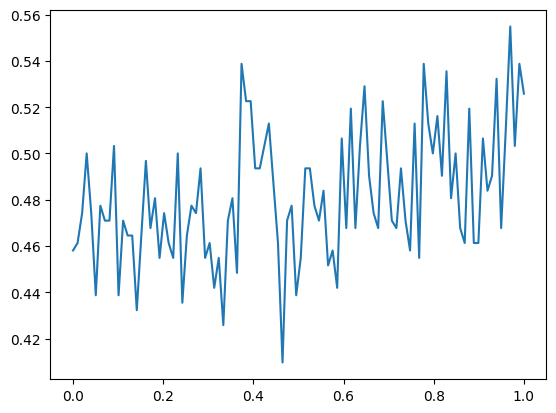

In [8]:
y_agg, y_vote=aggregate_labels_with_vote(df_test, y_pred )
print("Accuracy: ", accuracy_score(y_agg, y_vote))
seuils=np.linspace(0, 1, 100)
w=[accuracy_score(y_agg, aggregate_labels_with_vote(df_test, y_pred , s)[1]) for s in seuils]
plt.plot(seuils, w)


In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



# Classifiers in order of computational intensity
classifiers = {
    "Constant Baseline": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=0),
}

# Features and labels
significant_features = ["Effectif_Normalisé", "Effectif_Normalisé_Lissé", "Effectif_Normalisé_Lissé_Derivé", "Effectif_Normalisé_Lissé_Derivé_Seg"]
y_train = df_train["EventType_Mean"]
y_test = df_test["EventType_Mean"]

# Initialize a results dictionary
results = []

# Loop through each feature
for feature in significant_features:
    X_train_feature = df_train[[feature]]
    X_test_feature = df_test[[feature]]
    X_train_scaled = scaler.fit_transform(X_train_feature)
    X_test_scaled = scaler.transform(X_test_feature)

    # Test each classifier on the current feature
    for name, clf in classifiers.items():
        clf.fit(X_train_feature, y_train)
        y_pred = clf.predict(X_test_feature)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({"Feature": feature, "Classifier": name, "Accuracy": accuracy})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed i

In [27]:
results_df.head(40)

,Feature,Classifier,Accuracy
0,Effectif_Normalisé,Constant Baseline,0.458015
1,Effectif_Normalisé,Logistic Regression,0.481185
2,Effectif_Normalisé,k-NN,0.531341
3,Effectif_Normalisé,Random Forest,0.570530
4,Effectif_Normalisé,Gradient Boosting,0.584507
5,Effectif_Normalisé_Lissé,Constant Baseline,0.458015
6,Effectif_Normalisé_Lissé,Logistic Regression,0.458015
7,Effectif_Normalisé_Lissé,k-NN,0.493119
8,Effectif_Normalisé_Lissé,Random Forest,0.458123
9,Effectif_Normalisé_Lissé,Gradient Boosting,0.458230
